# 2D convolutions

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy import signal
from scipy import linalg
import time

Consider a 2D signal $\mathbf{v}$ representing a picture

(-0.5, 496.5, 371.5, -0.5)

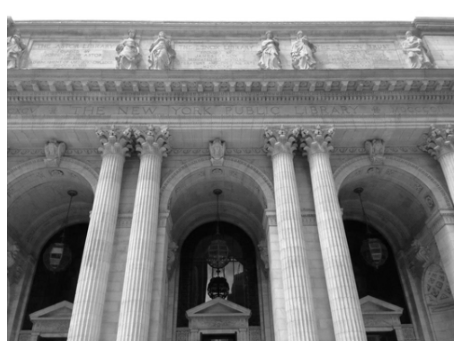

In [26]:
# write here the import path of the image
#image_path = '...'
#image_path = 'drive/My Drive/polimi/NAML/LAB/data/TarantulaNebula.jpg'
#image_path = 'drive/My Drive/polimi/NAML/LAB/data/mondrian.jpg'
image_path = 'drive/My Drive/polimi/NAML/LAB/data/NYlibrary.png'
#image_path = 'drive/My Drive/polimi/NAML/LAB/data/polimi.jpg'

v = np.mean(imread(image_path), axis = 2)

plt.rcParams['figure.figsize'] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(v, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')

Consider the following kernels

In [27]:
kernel_blur1 = np.array([[ 1,  2,  1],
                         [ 2,  4,  2],
                         [ 1,  2,  1]])
kernel_blur1 = kernel_blur1 / np.sum(kernel_blur1)

kernel_blur2 = np.ones((10,10)) / 100

kernel_edge1 = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])
kernel_edge2 = np.array([[ 0, -1,  0],
                         [-1,  4, -1],
                         [ 0, -1,  0]])
kernel_edge3 = np.array([[ 1,  0, -1],
                         [ 0,  0,  0],
                         [-1,  0,  1]])

kernel_sobel_horizontal = np.array([[ 1,  2,  1],
                                    [ 0,  0,  0],
                                    [-1, -2, -1]])
kernel_sobel_vertical = np.array([[ 1,  0, -1],
                                  [ 2,  0, -2],
                                  [ 1,  0, -1]])

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

kernel_drunk = np.random.randn(50,50)

Choose here the desired filter $\mathbf{k}$

In [28]:
k = kernel_sharpen

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

## 1. Direct definition (sums of products)

Convolution without "boundary layers"

Execution time: 2.02e+00 s


(-0.5, 494.5, 369.5, -0.5)

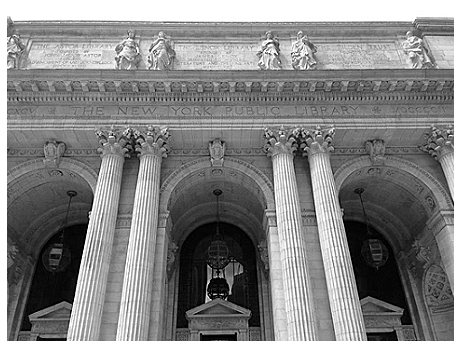

In [29]:
t0 = time.time()

s1 = np.array(v.shape)
s2 = np.array(k.shape)
s_out = s1 - s2 + 1
v_conv1 = np.empty(s_out)
for i in range(s_out[0]):
    for j in range(s_out[1]):
        v_conv1[i,j] = np.sum(np.flip(k) * v[i:i+s2[0], j:j+s2[1]])

print('Execution time: %1.2e s' % (time.time() - t0))

img = plt.imshow(v_conv1, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')

Execution time: 1.96e+00 s


(-0.5, 494.5, 369.5, -0.5)

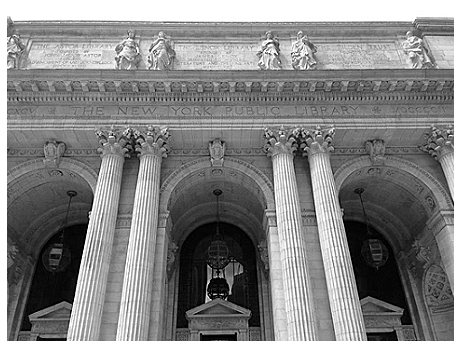

In [30]:
t0 = time.time()

s1 = np.array(v.shape)
s2 = np.array(k.shape)
s_out = s1 - s2 + 1
v_conv1 = np.array([[np.sum(np.flip(k) * v[i:i+s2[0], j:j+s2[1]]) for j in range(s_out[1])] for i in range(s_out[0])])

print('Execution time: %1.2e s' % (time.time() - t0))

img = plt.imshow(v_conv1, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')

## 2. Convolution through DFT

Besides the filtered image, plot the DFT of the original image, of the kernel and of the filtered image.

Execution time: 5.09e-02 s


(-0.5, 496.5, 371.5, -0.5)

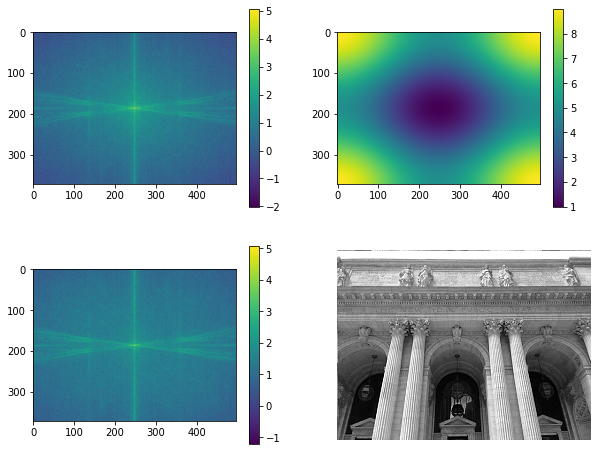

In [31]:
from numpy.fft import ifft2, fft2, fftshift, fftfreq

t0 = time.time()

v_fft = fft2(v)
k_fft = fft2(k, v.shape)

vk_fft = v_fft*k_fft

v_conv2 = np.real(ifft2(vk_fft))

print('Execution time: %1.2e s' % (time.time() - t0))

fig, axs = plt.subplots(2,2,figsize=(10,8))
img = axs[0,0].imshow(fftshift(np.log10(np.absolute(v_fft))))
fig.colorbar(img, ax = axs[0,0])
img = axs[0,1].imshow(fftshift((np.absolute(k_fft))))
fig.colorbar(img, ax = axs[0,1])
img = axs[1,0].imshow(fftshift(np.log10(np.absolute(vk_fft))))
fig.colorbar(img, ax = axs[1,0])
axs[1,1].imshow(v_conv2, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')

## 3. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

Execution time: 1.66e-02 s


(-0.5, 496.5, 371.5, -0.5)

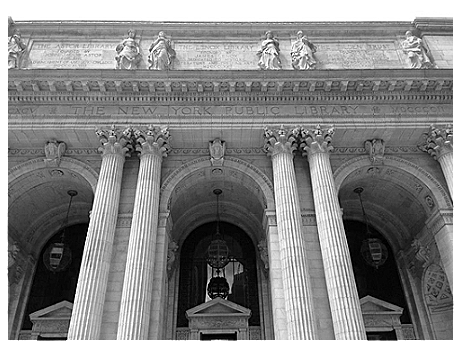

In [32]:
t0 = time.time()

v_conv3 = signal.convolve(v, k, mode = 'same')

print('Execution time: %1.2e s' % (time.time() - t0))

img = plt.imshow(v_conv3, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')